In [107]:
import sys, os
solver_path = '../'
paths = ('../',)
for p in paths:
    if p not in sys.path:
        sys.path.insert(0, p)

import matplotlib.pyplot as plt
import numpy as np
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [108]:
from rxndiffusion.cells import Cell

In [109]:
"""
IC - wildtype steady state
norm const - all normalized by max RNA concentration?

"""

'\nIC - wildtype steady state\nnorm const - all normalized by max RNA concentration?\n\n'

In [110]:
model

,a_0,a_1,a_2,a_3,bindsAsComplex_1,bindsAsComplex_2,delta,deltaProtein,input_species,k_1,k_2,max,maxTranslation,n_1,n_2,numActivators_1,numActivators_2,numDeactivators_1,numDeactivators_2,reacion_name
G_degradation,NaN,NaN,NaN,NaN,NaN,NaN,0.018427,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G_degradation
G_synthesis,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.045618,[],NaN,NaN,0.018427,0.045618,NaN,NaN,NaN,NaN,NaN,NaN,G_synthesis: no inputs
u_degradation,NaN,NaN,NaN,NaN,NaN,NaN,0.023785,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,u_degradation
u_synthesis,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.039523,[],NaN,NaN,0.023785,0.039523,NaN,NaN,NaN,NaN,NaN,NaN,u_synthesis: no inputs
x_degradation,NaN,NaN,NaN,NaN,NaN,NaN,0.019762,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x_degradation
x_synthesis,0.052535,1.000000,NaN,NaN,1.0,NaN,NaN,0.022765,[u],0.010000,NaN,0.019762,0.022765,1.000000,NaN,1.0,NaN,0.0,NaN,x_synthesis: (1)
y_degradation,NaN,NaN,NaN,NaN,NaN,NaN,0.028118,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y_degradation
y_synthesis,0.009989,0.610512,0.715398,1.0,1.0,0.0,NaN,0.034061,"[x, G]",0.793074,0.754036,0.028118,0.034061,3.031295,2.191012,1.0,1.0,0.0,0.0,y_synthesis: (1) + (2)


In [112]:
cell = Cell()
cell.add_gene(name='u', k=.039523, g1=.023785, g2=.039523)
cell.add_gene(name='x', k=.022765, g1=.019762, g2=.022765)
cell.add_gene(name='y', k=.034061, g1=.028118, g2=.034061)
cell.add_gene(name='g', k=.045618, g1=.018427, g2=.045618)

# input transcription
s = 1
cell.add_transcription('u', factors=None, k=.023785, alpha=[0], k_m=None, n=None, rho=1)
cell.add_transcription('g', factors=None, k=0.018427, alpha=[1/s], k_m=None, n=None, rho=1)
cell.add_transcription('x', factors=('u'), k=0.019762, alpha=[0.052535/s, 1/s], k_m=[0.01/s], n=[1/s], rho=1)
cell.add_transcription('y', factors=('x', 'g'), k=0.028118, alpha=[0.0099887333/s, 0.6105120514/s, 0.7153982451/s, 1.0/s], k_m=[0.793074/s, 0.754036/s], n=[3.031295, 2.191012], rho=1)

In [ ]:
"""
try running GNW and seeing how input params relate to otuput params

1. write code to get nondimensionalization terms (solve for max conc)
2. write code to get get SS


"""

In [113]:
ic = np.ones(cell.nodes.size)*1
simulation = MonteCarloSimulation(cell, ic=ic)

In [114]:
out = simulation.run(input_function=cSignal(0.), num_trials=1, duration=1000, dt=1)

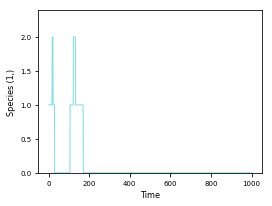

In [115]:
out.plot_samples(dims=(cell.proteins['u'],))

In [46]:
out.states

array([[[100,  98,  96, ...,   0,   0,   0],
        [100,  96,  99, ...,   0,   0,   0],
        [100,  99,  96, ...,   1,   1,   1],
        ...,
        [100, 102,  98, ...,   0,   0,   0],
        [100,  97,  96, ...,   0,   0,   0],
        [100,  99, 101, ...,   0,   0,   0]]], dtype=uint32)

In [6]:
from rxndiffusion.solver.signals import cSignal
from rxndiffusion.simulate import MonteCarloSimulation

In [15]:
import pandas as pd

In [20]:
string = '{"a_0":{"u_synthesis":0.0,"x_synthesis":0.0525348357,"u_degradation":null,"x_degradation":null,"G_degradation":null,"G_synthesis":1.0,"y_degradation":null,"y_synthesis":0.0099887333},"a_1":{"u_synthesis":null,"x_synthesis":1.0,"u_degradation":null,"x_degradation":null,"G_degradation":null,"G_synthesis":null,"y_degradation":null,"y_synthesis":0.6105120514},"a_2":{"u_synthesis":null,"x_synthesis":null,"u_degradation":null,"x_degradation":null,"G_degradation":null,"G_synthesis":null,"y_degradation":null,"y_synthesis":0.7153982451},"a_3":{"u_synthesis":null,"x_synthesis":null,"u_degradation":null,"x_degradation":null,"G_degradation":null,"G_synthesis":null,"y_degradation":null,"y_synthesis":1.0},"bindsAsComplex_1":{"u_synthesis":null,"x_synthesis":1.0,"u_degradation":null,"x_degradation":null,"G_degradation":null,"G_synthesis":null,"y_degradation":null,"y_synthesis":1.0},"bindsAsComplex_2":{"u_synthesis":null,"x_synthesis":null,"u_degradation":null,"x_degradation":null,"G_degradation":null,"G_synthesis":null,"y_degradation":null,"y_synthesis":0.0},"delta":{"u_synthesis":null,"x_synthesis":null,"u_degradation":0.02378463,"x_degradation":0.0197623502,"G_degradation":0.0184274487,"G_synthesis":null,"y_degradation":0.0281179978,"y_synthesis":null},"deltaProtein":{"u_synthesis":0.0395225603,"x_synthesis":0.0227651688,"u_degradation":null,"x_degradation":null,"G_degradation":null,"G_synthesis":0.0456182946,"y_degradation":null,"y_synthesis":0.034060765},"input_species":{"u_synthesis":[],"x_synthesis":["u"],"u_degradation":[],"x_degradation":[],"G_degradation":[],"G_synthesis":[],"y_degradation":[],"y_synthesis":["x","G"]},"k_1":{"u_synthesis":null,"x_synthesis":0.01,"u_degradation":null,"x_degradation":null,"G_degradation":null,"G_synthesis":null,"y_degradation":null,"y_synthesis":0.7930738261},"k_2":{"u_synthesis":null,"x_synthesis":null,"u_degradation":null,"x_degradation":null,"G_degradation":null,"G_synthesis":null,"y_degradation":null,"y_synthesis":0.754035527},"max":{"u_synthesis":0.02378463,"x_synthesis":0.0197623502,"u_degradation":null,"x_degradation":null,"G_degradation":null,"G_synthesis":0.0184274487,"y_degradation":null,"y_synthesis":0.0281179978},"maxTranslation":{"u_synthesis":0.0395225603,"x_synthesis":0.0227651688,"u_degradation":null,"x_degradation":null,"G_degradation":null,"G_synthesis":0.0456182946,"y_degradation":null,"y_synthesis":0.034060765},"n_1":{"u_synthesis":null,"x_synthesis":1.0,"u_degradation":null,"x_degradation":null,"G_degradation":null,"G_synthesis":null,"y_degradation":null,"y_synthesis":3.0312945854},"n_2":{"u_synthesis":null,"x_synthesis":null,"u_degradation":null,"x_degradation":null,"G_degradation":null,"G_synthesis":null,"y_degradation":null,"y_synthesis":2.1910115826},"numActivators_1":{"u_synthesis":null,"x_synthesis":1.0,"u_degradation":null,"x_degradation":null,"G_degradation":null,"G_synthesis":null,"y_degradation":null,"y_synthesis":1.0},"numActivators_2":{"u_synthesis":null,"x_synthesis":null,"u_degradation":null,"x_degradation":null,"G_degradation":null,"G_synthesis":null,"y_degradation":null,"y_synthesis":1.0},"numDeactivators_1":{"u_synthesis":null,"x_synthesis":0.0,"u_degradation":null,"x_degradation":null,"G_degradation":null,"G_synthesis":null,"y_degradation":null,"y_synthesis":0.0},"numDeactivators_2":{"u_synthesis":null,"x_synthesis":null,"u_degradation":null,"x_degradation":null,"G_degradation":null,"G_synthesis":null,"y_degradation":null,"y_synthesis":0.0},"reacion_name":{"u_synthesis":"u_synthesis: no inputs","x_synthesis":"x_synthesis: (1)","u_degradation":"u_degradation","x_degradation":"x_degradation","G_degradation":"G_degradation","G_synthesis":"G_synthesis: no inputs","y_degradation":"y_degradation","y_synthesis":"y_synthesis: (1) + (2)"}}'
model = pd.read_json(string)

In [2]:


from circadian.oscillator import Oscillator
from circadian.population import Population

from rxndiffusion.solver.signals import cSignal
from rxndiffusion.solver.rxns import RateFunction
from array import array

In [3]:
""" Firing the wrong reaction... need to adjust rxn_fired to new vector lengths """

' Firing the wrong reaction... need to adjust rxn_fired to new vector lengths '

In [8]:
# ic = np.ones(cell.nodes.size)*100
# simulation = MonteCarloSimulation(cell, ic=ic)
# simulation.run(input_function=cSignal(0.), num_trials=1, duration=1, dt=1)

In [6]:
cell = Population(Oscillator(transcription=False, omega=100), replicates=10)
cell.add_dense_coupling(a=0.2, w=.005)
#cell = Oscillator(transcription=True, omega=100)
#cell.reactions = [rxn for rxn in cell.reactions if rxn.__class__.__name__!='Reaction']
cell.sort_rxns()

In [7]:
ic = np.ones(cell.nodes.size)*100
simulation = MonteCarloSimulation(cell, ic=ic)
out = simulation.run(input_function=cSignal(0.), num_trials=1, duration=24*10, dt=1)

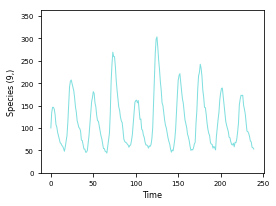

In [8]:
out.plot_samples(dims=(cell.proteins[0]['nC'],))

In [29]:
rxn.propensity

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [41]:
rxn_id = 2

# define cell and inpute
cell = Oscillator(transcription=True, omega=100)
cell.sort_rxns()
states = array('l', 20*np.ones(cell.nodes.size, dtype=np.int64)) 
cumul = array('d', 10*np.ones(cell.nodes.size, dtype=np.float64))
input_value = cSignal(1)(0)


rf = RateFunction(cell)
rxn_name = dict(Coupling=0, Reaction=1, EnzymaticReaction=2)
rxn_types = [rxn.__class__.__name__ for rxn in cell.reactions]
rxn_types[rxn_id]

'EnzymaticReaction'

In [42]:
rf.cRateFunction.evaluate(rxn_id, states, input_value, cumul)

35.0

In [43]:
rxn = cell.reactions[rxn_id]
rxn.get_rate(np.array(states), np.array(input_value))

array([35.])

In [5]:
n_active_species = array('l', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1])
species = array('l', [0, 0, 1, 2, 2, 3, 4, 5, 6, 7, 5, 7, 8, 8, 8, 9, 9])
species_dependence = array('d', [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
species_ind = array('l', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17])

In [8]:
get_species_activity_product(11, states)

count 0
state 8
n 20
k 1.0
activity 20


20

In [7]:
def get_species_activity_product(rxn, states):
    """ Integrate species activity for specified reaction. """
    
    index = species_ind[rxn]
    N = n_active_species[rxn]
    activity = 1

    # integrate species activity
    for count in range(N):
        dim = species[index]
        n = states[dim]
        k = species_dependence[index]
        if k == 1:
            activity *= n
        elif k == 2:
            activity *= (n*(n-1)/2)
        else:
            activity = 0
        index += 1
        
    print('count', count)
    print('state', dim)
    print('n', n)
    print('k', k)
    print('activity', activity)

    return activity

In [ ]:
cdef double get_species_activity(self, int rxn, array states) nogil:
        return <double>self.get_species_activity_product(rxn, states)

cdef int get_species_activity_product(self, int rxn, array states) nogil:
    """ Integrate species activity for specified reaction. """
    cdef int count, n, k
    cdef int index = self.species_ind.data.as_longs[rxn]
    cdef int N = self.n_active_species.data.as_longs[rxn]
    cdef int activity = 1

    # integrate species activity
    for count in xrange(N):
        n = states.data.as_longs[index]
        k = self.species_dependence.data.as_longs[index]
        if k == 1:
            activity *= n
        elif k == 2:
            activity *= (n*(n-1)/2)
        else:
            activity = 0
        index += 1

    return activity

cdef double get_species_activity_sum(self, int rxn, array states) nogil:
    """ Integrate species activity for specified reaction. """
    cdef int count, n, k
    cdef int index = self.species_ind.data.as_longs[rxn]
    cdef int N = self.n_active_species.data.as_longs[rxn]
    cdef int activity = 0

    # integrate species activity
    for count in xrange(N):
        n = states.data.as_longs[index]
        k = self.species_dependence.data.as_longs[index]
        activity += (n * k)
        index += 1

    return activity

In [6]:
from rxndiffusion.solver.rxns import cRxnMap, RateFunction

In [9]:
adict = RateFunction.get_rxn_map(cell)

In [14]:
a,b,c = cRxnMap.dict_to_array(adict)

c

array([17, 18,  3,  2, 14, 15,  2, 14, 15, 17, 18,  3,  4,  5,  6, 16, 20,
        4,  5,  6, 16, 20,  5,  6,  7, 12, 20, 21, 24,  5,  6,  7, 12, 20,
       21, 24,  8,  9, 10, 19, 22,  8,  9, 10, 19, 22,  9, 10, 11, 13, 22,
       23, 24,  9, 10, 11, 13, 22, 23, 24, 24, 12, 21,  7, 24, 11, 13, 23,
        2, 14, 15, 16,  4, 16,  4, 17, 18,  3,  8, 19,  8, 19, 20,  5,  6,
       24, 12, 21,  7,  9, 10, 22, 24, 11, 13, 23,  7, 11, 12, 13, 21, 23,
       24, 25, 26, 27,  7, 11, 12, 13, 21, 23, 24, 25, 26, 27, 25, 26, 27,
        0,  1, 25, 26, 27, 28, 29,  0,  1, 25, 26, 27, 28, 29,  0,  1, 28,
       29])

In [6]:
rxns = [rxn for rxn in cell.reactions if rxn.__class__.__name__=='EnzymaticReaction']

In [8]:
species = np.hstack([rxn.active_substrates for rxn in rxns])
species

array([0, 2, 1, 4, 4, 5, 3, 6, 6, 7, 5, 7])

In [11]:
reps = reduce(add, [rxn.repressors for rxn in rxns])

In [17]:

#np.hstack()

[rxn.active_substrates for rxn in reps]

[]

In [14]:
species_ind =np.cumsum([0]+[rxn.num_active_substrates for rxn in reps])
species = np.hstack([rxn.active_substrates for rxn in reps])
species_dependence = np.hstack([rxn._propensity for rxn in reps])
inputs_ind = np.cumsum([0]+[rxn.num_active_inputs for rxn in reps])
inputs = np.hstack([rxn.active_inputs for rxn in reps])
input_dependence = np.hstack([rxn._input_dependence for rxn in reps])

ValueError: need at least one array to concatenate

In [ ]:
input_dependence = np.hstack([rxn._input_dependence for rxn in reps])

In [ ]:
inputs = np.hstack([rxn.active_inputs for rxn in reps])

In [5]:
rxns = [rxn for rxn in cell.reactions if rxn.__class__.__name__=='Coupling']

In [16]:
arr = np.ones(3)
arr.astype

<function ndarray.astype>

In [12]:
rxn = cell.reactions[0]
rxn._propensity

array([], dtype=float64)

In [13]:
for rxn in rxns:
    for rep in rxn.repressors:
        print(rep.k_m)

NameError: name 'rxns' is not defined

In [14]:
reps = reduce(add, [rxn.repressors for rxn in rxns])

NameError: name 'reduce' is not defined

In [11]:
alist = [rxn.k_m for rxn in reps]
k_m = np.ndarray(alist, dtype=np.float64)

NameError: name 'reps' is not defined

In [26]:
arr = np.array(alist, dtype=np.float64)

In [28]:
isinstance(arr, np.ndarray)

True

In [10]:
from functools import reduce
from operator import add

In [10]:
def from_list(rxns):
    """ Instantiate from list of reactions. """

    # get repressors
    reps = reduce(add, [rxn.repressors for rxn in rxns])

    # get parameters
    M = len(reps)
    k_m = np.ndarray([rxn.k_m for rxn in reps], dtype=np.float64)
    n = np.ndarray([rxn.n for rxn in reps], dtype=np.float64)

    # get species dependence
    species_ind = np.cumsum([0]+[rxn.num_active_substrates for rxn in reps])
    species = np.hstack([rxn.active_substrates for rxn in reps])
    species_dependence = np.hstack([rxn._propensity for rxn in reps])

In [3]:
from rxndiffusion.reactions import Reaction
from rxndiffusion.networks import MutableNetwork, Graph

class SimpleGene:
    """
    System dimensions:
        0: Gene
        1: Product
    """
    def __init__(self, name='gene', k=1, g=1):

        self.nodes = np.arange(2)
        self.genes = {name: 0}
        self.proteins = {name: 1}

        protein_name = name.upper()
        translation = protein_name + ' translation'
        protein_decay = protein_name + ' decay'

        # define reactions
        self.reactions = [
            Reaction([0, 1], [1, 0], k=k, rxn_type=translation),
            Reaction([0, -1], [0, 1], k=g, rxn_type=protein_decay)]

class Gene:
    """
    System dimensions:
        0: Gene
        1: mRNA
        2: Protein
    """
    def __init__(self, name='gene', k1=1, k2=1, g1=1, g2=1):

        self.nodes = np.arange(3)
        self.genes = {name: 0}
        self.transcripts = {name: 1}
        self.proteins = {name: 2}

        gene_name = name[0].lower()
        transcription = gene_name + ' transcription'
        mrna_decay = gene_name + ' decay'
        protein_name = name.upper()
        translation = protein_name + ' translation'
        protein_decay = protein_name + ' decay'


        # define reactions
        self.reactions = [

            # transcript synthesis/decay
            Reaction([0, 1, 0], [1, 0, 0], k=k1, rxn_type=transcription),
            Reaction([0, -1, 0], [0, 1, 0], k=g1, rxn_type=mrna_decay),

            # protein synthesis/decay
            Reaction([0, 0, 1], [0, 1, 0], k=k2, rxn_type=translation),
            Reaction([0, 0, -1], [0, 0, 1], k=g2, rxn_type=protein_decay)]


class Cell(MutableNetwork):
    def __init__(self, genes=('Yan', 'Pnt'), num_inputs=2, **kwargs):
        MutableNetwork.__init__(self, 0, inputs=num_inputs)
        self.genes = {}
        self.promoters = {}
        self.transcripts = {}
        self.proteins = {}
        self.phosphorylated = {}

        # add genes
        self.add_genes(genes, **kwargs)

    def __repr__(self):
        graph = Graph(self)
        graph.show_reactions()
        return ''

    def get_ic(self, dosage, ic=None):
        """ Get initial condition for cell. """

        # if IC is none, assume all genes in ground state
        if ic is None:
            ic = np.zeros(self.nodes.size, dtype=np.int64)
            for gene, ncopies in dosage.items():
                ic[self.genes[gene]] = ncopies

        # if IC is mean,var tuple, sample ICs from gaussian
        elif type(ic) == tuple:
            mean, var = ic
            ic = np.random.normal(mean, np.sqrt(var), size=mean.size).astype(int)
            ic[ic<0] = 0

        # constrain total gene dosage, prioritizing ground states
        for gene, ncopies in dosage.items():
            off = ic[self.genes[gene]]
            if off > ncopies:
                off = ncopies

            if len(self.promoters[gene]) == 1:
                on = ncopies - off
                ic[list(self.promoters[gene].values())[0]] = on
            else:
                taken = 0
                for bound_state in self.promoters[gene].values():
                    while ic[bound_state] > ncopies - off - taken:
                        ic[bound_state] -= 1
                    taken = deepcopy(ic[bound_state])
                on = sum([ic[bound_state] for bound_state in self.promoters[gene].values()])
                diff = ncopies - (on+off)
                if diff > 0:
                    ic[self.genes[gene]] += diff

        return ic

    def update(self):
        self.node_key = {index: int(node_id) for index, node_id in enumerate(self.nodes)}
        self.compile_stoichiometry()
        self.resize_inputs()

    def add_genes(self, names, **kwargs):
        for name in names:
            self.add_gene(name=name, **kwargs)

    def add_gene(self, **kwargs):

        gene = Gene(**kwargs)

        # update nodes and reactions
        shift = self.nodes.size
        added_node_ids = np.arange(shift, shift+gene.nodes.size)
        self.update_reaction_dimensions(added_node_ids=added_node_ids)

        # add new nodes
        self.nodes = np.append(self.nodes, added_node_ids)
        self.reactions.extend([rxn.shift(shift) for rxn in gene.reactions])

        # update dictionaries
        self.genes.update({k: v+shift for k,v in gene.genes.items()})
        self.transcripts.update({k: v+shift for k,v in gene.transcripts.items()})
        self.proteins.update({k: v+shift for k,v in gene.proteins.items()})
        self.promoters.update({k: {} for k in gene.genes.keys()})
        self.update()

    def add_active_form(self, target, kf=0., kr=0., g=0.):

        # update nodes and reactions
        node_id = self.nodes.size
        added_node_ids = np.arange(node_id, node_id+1)
        self.update_reaction_dimensions(added_node_ids=added_node_ids)

        # add new nodes
        self.nodes = np.append(self.nodes, added_node_ids)

        # update dictionaries
        self.proteins.update({'p'+target: node_id})
        self.phosphorylated.update({target: node_id})

        # add forward reaction
        stoichiometry = np.zeros(self.nodes.size, dtype=np.int64)
        stoichiometry[self.proteins[target]] = -1
        stoichiometry[node_id] = 1
        propensity = np.zeros(self.nodes.size, dtype=np.int64)
        propensity[self.proteins[target]] = 1
        activation_name = target.upper() + ' phosphorylation'
        activation = Reaction(stoichiometry, propensity, None, k=kf, rxn_type=activation_name)

        # add reverse reaction
        stoichiometry = np.zeros(self.nodes.size, dtype=np.int64)
        stoichiometry[self.proteins[target]] = 1
        stoichiometry[node_id] = -1
        propensity = np.zeros(self.nodes.size, dtype=np.int64)
        propensity[node_id] = 1
        deactivation_name = target.upper() + ' dephosphorylation'
        deactivation = Reaction(stoichiometry, propensity, None, k=kr, rxn_type=deactivation_name)

        # add decay
        stoichiometry = np.zeros(self.nodes.size, dtype=np.int64)
        stoichiometry[node_id] = -1
        decay = Reaction(stoichiometry, None, None, k=g, rxn_type='decay')

        # add reactions
        rxns = [rxn for rxn in [activation, deactivation, decay] if rxn.rate_constant != 0]
        self.reactions.extend(rxns)
        self.update()

    def get_synthesis_reaction(self, gene, product, k, name='synthesis'):
        s = np.zeros(self.nodes.size, dtype=np.int64)
        p = np.zeros(self.nodes.size, dtype=np.int64)
        s[self.transcripts[product]] = 1
        p[gene] = 1
        rxn = Reaction(s, p, k=k, rxn_type=name)
        return rxn

    def add_promoter_binding(self, factor, gene, bound=None, kf=1, kr=1, k=1):

        # update nodes, reactions, and promoters
        node_id = self.nodes.size
        added_node_ids = np.arange(node_id, node_id+1)
        self.update_reaction_dimensions(added_node_ids=added_node_ids)
        self.nodes = np.append(self.nodes, added_node_ids)

        # determine whether acting on unbound or bound gene
        if bound is None:
            target = self.genes[gene]
            name = '-'.join((factor, gene[0].lower()))
            self.promoters[gene].update({factor: node_id})
        else:
            target = self.promoters[gene][bound]
            name = '-'.join((factor, bound, gene[0].lower()))

        # get promoter binding/unbinding stoichiometry
        stoichiometry = np.zeros(self.nodes.size, dtype=np.int64)
        stoichiometry[target] = -1
        stoichiometry[node_id] = 1

        # if transcription factor is not an input, it is consumed
        if 'IN' not in factor:
            stoichiometry[self.proteins[factor]] = -1
            in_dep = None

        # if transcription factor is an input, promoter is always active
        else:
            if '_' in factor:
                in_dep = np.zeros(self.input_size, dtype=float)
                in_dep[int(factor.split('_')[-1])] = 1
            else:
                in_dep = 1

        # add binding/unbinding
        binding = Reaction(stoichiometry, None, in_dep, kf, rxn_type=name+' binding')
        unbinding = Reaction(-stoichiometry, None, None, kr, rxn_type=name+' unbinding')

        # add transcription
        synthesis_name = name+' transcription'
        synthesis = self.get_synthesis_reaction(node_id, gene, k, synthesis_name)

        # add reactions with nonzero rate
        rxns = (binding, unbinding, synthesis)
        self.reactions.extend([rxn for rxn in rxns if rxn.rate_constant!=0])
        self.update()

    def add_repressor(self, factor, gene, kf=1, kr=1, k=0., simple=True, multiplex=False):
        promoters = deepcopy(self.promoters[gene])
        if simple:
            self.add_promoter_binding(factor, gene, None, kf, kr, k)
        if multiplex:
            for promoter in promoters.keys():
                self.add_promoter_binding(factor, gene, promoter, kf, kr, k)

In [4]:
from time import time

In [5]:
cell = Cell()
_ = [cell.add_gene() for _ in range(10)]
dosage = dict(Yan=2, Pnt=2)
ic = cell.get_ic(dosage)
perturbation = cMultiPulse(t_on=[10], t_off=[20], off=[0.], on=[1.])
sim = MonteCarloSimulation(cell, ic=ic)

In [11]:
%%prun -D profiler.prof
s = time()
out = sim.run(perturbation, num_trials=1000, duration=100, dt=1, pure_ssa=False)
print(time()-s)

4.055610179901123
 
*** Profile stats marshalled to file 'profiler.prof'. 


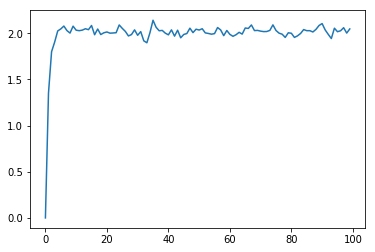

In [10]:
fig, ax = plt.subplots()
ax.plot(out.t, out.mean[1])

In [32]:
cell.add_transcriptional_repressor(1, 0)

In [34]:
rxn = cell.reactions[-2]

In [38]:
rxn.active_substrates

array([], dtype=int64)

In [36]:
rep = rxn.repressors[0]

In [37]:
rep.active_substrates

array([1])

In [33]:
cell = Cell()

In [30]:
cell.nodes

array([0, 1, 2, 3, 4, 5])